<a href="https://colab.research.google.com/github/avishek-choudhary/Bharat-Intern/blob/main/Stock_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1
## Stock Prediction using LSTM
## Author: *Avishek Choudhary*
<a href="https://www.linkedin.com/in/avishek-choudhary"> ![](https://img.shields.io/badge/LinkedIn-grey?style=for-the-badge&logo=linkedin&logoColor=blue)</a> <a href="https://www.github.com/avishek-choudhary"> ![](https://img.shields.io/badge/Github-grey?style=for-the-badge&logo=github) </a>

This is a time series forecasting problem. It is an attempt to forecasting the data by understanding the previous data.

Steps in forecasting:

    *Problem statement
    *Data Collection
    *Explore the data
    *Pre-process the data
    *Create a stacked LSTM model
    *Predict and plot the test data
    *Forecast for 30 days and plot the output
    
Stock data is a sequential data that is they need to be analysed according to the order by time.
In Recurrent Neural Network RNN we are dealt with problem of vanishing gradient thus previous data will become less significant after long backpropagation. That is memory is not that deep. So we use Long short term memory LSTM. This is because stock prediction need long term memory.

### 1. Problem Statement
Take stock price of any company and predicts its price by using LSTM



---

### 2. Data Collection
Collecting the data from Tingo.com using Tiingo's API

Here we are collecting Tata Consultancy Services (TCS) stocks data.

In [44]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import sklearn

In [11]:
df = pdr.get_data_tiingo('TCS', api_key = key)        #'key' stores the api key [!deleted]
df.to_csv('TCS.csv')                                  #saving the data to CSV file

<ipython-input-11-7bfcab3382bf>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('TCS', api_key = key)        #'key' store the api key




---

### 3. Exploring the data

In [12]:
df = pd.read_csv('TCS.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TCS,2018-09-26 00:00:00+00:00,10.82,11.11,10.8100,10.90,202263,10.179944,10.452789,10.170535,10.255211,202263,0.0,1.0
1,TCS,2018-09-27 00:00:00+00:00,10.93,10.97,10.7310,10.82,172309,10.283437,10.321070,10.096208,10.179944,172309,0.0,1.0
2,TCS,2018-09-28 00:00:00+00:00,11.10,11.21,10.8400,10.89,433523,10.443380,10.546873,10.198761,10.245803,433523,0.0,1.0
3,TCS,2018-10-01 00:00:00+00:00,10.44,11.13,10.3500,11.10,241074,9.822423,10.471606,9.737746,10.443380,241074,0.0,1.0
4,TCS,2018-10-02 00:00:00+00:00,10.26,10.46,10.1301,10.41,224051,9.653070,9.841239,9.530855,9.794197,224051,0.0,1.0


In [20]:
df = pd.read_csv('TCS.csv', parse_dates=True, index_col='date')
df.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2018-09-26 00:00:00+00:00,TCS,10.82,11.11,10.8100,10.90,202263,10.179944,10.452789,10.170535,10.255211,202263,0.0,1.0
2018-09-27 00:00:00+00:00,TCS,10.93,10.97,10.7310,10.82,172309,10.283437,10.321070,10.096208,10.179944,172309,0.0,1.0
2018-09-28 00:00:00+00:00,TCS,11.10,11.21,10.8400,10.89,433523,10.443380,10.546873,10.198761,10.245803,433523,0.0,1.0
2018-10-01 00:00:00+00:00,TCS,10.44,11.13,10.3500,11.10,241074,9.822423,10.471606,9.737746,10.443380,241074,0.0,1.0
2018-10-02 00:00:00+00:00,TCS,10.26,10.46,10.1301,10.41,224051,9.653070,9.841239,9.530855,9.794197,224051,0.0,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2018-09-26 00:00:00+00:00 to 2023-09-22 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   close        1256 non-null   float64
 2   high         1256 non-null   float64
 3   low          1256 non-null   float64
 4   open         1256 non-null   float64
 5   volume       1256 non-null   int64  
 6   adjClose     1256 non-null   float64
 7   adjHigh      1256 non-null   float64
 8   adjLow       1256 non-null   float64
 9   adjOpen      1256 non-null   float64
 10  adjVolume    1256 non-null   int64  
 11  divCash      1256 non-null   float64
 12  splitFactor  1256 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.4+ KB


**Choosing** *close* column data for predictions

<Axes: xlabel='date'>

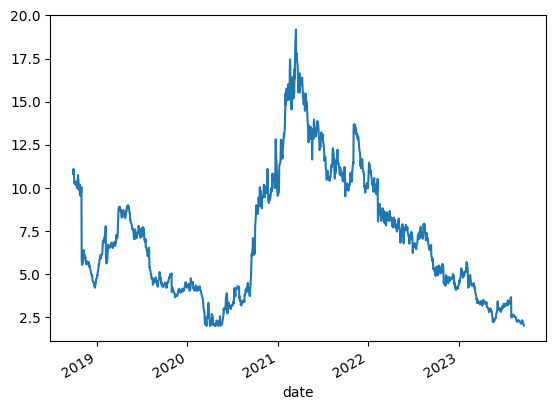

In [22]:
df['close'].plot()

In [26]:
df_close = df['close']
df_close

date
2018-09-26 00:00:00+00:00    10.82
2018-09-27 00:00:00+00:00    10.93
2018-09-28 00:00:00+00:00    11.10
2018-10-01 00:00:00+00:00    10.44
2018-10-02 00:00:00+00:00    10.26
                             ...  
2023-09-18 00:00:00+00:00     2.19
2023-09-19 00:00:00+00:00     2.16
2023-09-20 00:00:00+00:00     2.13
2023-09-21 00:00:00+00:00     2.10
2023-09-22 00:00:00+00:00     2.02
Name: close, Length: 1256, dtype: float64

In [29]:
df_close.reset_index(drop = True, inplace = True)



---


### 4. Pre-processing the data

LSTM are sensitive to the scale of the data. So we apply MinMax scaler.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1, 1))

In [32]:
df_close.shape

(1256, 1)

Splitting the dataset into Train and Test split

In [33]:
training_size = int(len(df_close) * 0.70)                   #training with 70% of data
test_size = len(df_close) - training_size                   #testing with remaining 30%

In [34]:
train_data = df_close[0:training_size,:]
test_data = df_close[training_size:len(df_close),:1]

In [37]:
#converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [38]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
xtrain, ytrain = create_dataset(train_data, time_step)
xtest, ytest = create_dataset(test_data, time_step)

In [39]:
xtrain.shape, ytrain.shape

((778, 100), (778,))

In [40]:
xtest.shape, ytest.shape

((276, 100), (276,))

In [45]:
#reshape the input to be [samples, time steps, features] which is required for LSTM
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

---

### 5. Creating the LSTM model

In [46]:
#importing required libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 172ms/step - loss: 0.0586 - val_loss: 0.0042
Epoch 2/100
13/13 [==============================] - 1s 101ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 3/100
13/13 [==============================] - 1s 106ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 4/100
13/13 [==============================] - 2s 119ms/step - loss: 0.0048 - val_loss: 7.5302e-04
Epoch 5/100
13/13 [==============================] - 2s 137ms/step - loss: 0.0036 - val_loss: 8.0510e-04
Epoch 6/100
13/13 [==============================] - 1s 106ms/step - loss: 0.0032 - val_loss: 7.6556e-04
Epoch 7/100
13/13 [==============================] - 1s 107ms/step - loss: 0.0030 - val_loss: 8.5174e-04
Epoch 8/100
13/13 [==============================] - 1s 104ms/step - loss: 0.0029 - val_loss: 6.6435e-04
Epoch 9/100
13/13 [==============================] - 1s 105ms/step - loss: 0.0027 - val_loss: 7.0932e-04
Epoch 10/100
13/13 [==============================] - 1s 106ms/step

---

### 6. Predicting and plotting test data

In [50]:
#predicting and checking performance metrics
train_predict = model.predict(xtrain)
test_predict = model.predict(xtest)

9/9 [==============================] - 0s 21ms/step


In [51]:
#transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculating RMSE performance metrics

In [56]:
import math
from sklearn.metrics import mean_squared_error

In [57]:
#Train data RMSE
math.sqrt(mean_squared_error(ytrain, train_predict))

8.751301684029713

In [58]:
#Test data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

4.2511192725746225

In [59]:
#shifting train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shifting test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1,:] = test_predict

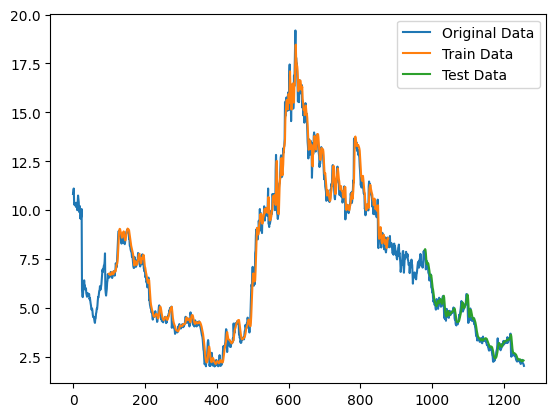

In [67]:
# plotting
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original Data', 'Train Data', 'Test Data'])
plt.show()

---

### 7. Forecasting the data for 30 days

In [68]:
len(test_data)

377

In [69]:
xinput = test_data[len(test_data)-100:].reshape(1, -1)
xinput.shape

(1, 100)

In [71]:
#converting into list
temp_ip = list(xinput)
temp_ip = temp_ip[0].tolist()

In [72]:
temp_ip

[0.055232558139534885,
 0.05,
 0.04709302325581392,
 0.055813953488372106,
 0.059302325581395324,
 0.059302325581395324,
 0.05232558139534883,
 0.057558139534883715,
 0.04941860465116278,
 0.05,
 0.04186046511627907,
 0.033139534883720914,
 0.030232558139534862,
 0.014534883720930244,
 0.013953488372093023,
 0.024418604651162787,
 0.023837209302325565,
 0.016860465116279047,
 0.02093023255813954,
 0.02790697674418606,
 0.02732558139534884,
 0.028488372093023254,
 0.04244186046511629,
 0.047674418604651145,
 0.05232558139534883,
 0.06569767441860465,
 0.08372093023255812,
 0.06511627906976743,
 0.059883720930232545,
 0.06104651162790696,
 0.05465116279069766,
 0.06046511627906974,
 0.05290697674418603,
 0.05465116279069766,
 0.048255813953488366,
 0.05290697674418603,
 0.05348837209302325,
 0.06627906976744184,
 0.06686046511627906,
 0.059883720930232545,
 0.06627906976744184,
 0.06686046511627906,
 0.07616279069767438,
 0.06511627906976743,
 0.06627906976744184,
 0.06860465116279067,
 

In [91]:
#forecasting data for 30 days
output=[]
n_steps = 100
i = 0
while(i<30):

    if(len(temp_ip)>100):
        #print(temp_ip)
        xinput = np.array(temp_ip[1:])
        print("{} day input {}".format(i,xinput))
        xinput = xinput.reshape(1,-1)
        xinput = xinput.reshape((1, n_steps, 1))
        #print(xinput)
        yhat = model.predict(xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_ip.extend(yhat[0].tolist())
        temp_ip = temp_ip[1:]
        #print(temp_ip)
        output.extend(yhat.tolist())
        i=i+1
    else:
        xinput = xinput.reshape((1, n_steps,1))
        yhat = model.predict(xinput, verbose=0)
        print(yhat[0])
        temp_ip.extend(yhat[0].tolist())
        print(len(temp_ip))
        output.extend(yhat.tolist())
        i = i+1

print(output)

0 day input [0.10008953 0.10196476 0.10384255 0.10572316 0.10760679 0.1094937
 0.11138413 0.11327835 0.11517657 0.11707906 0.11898612 0.12089799
 0.12281496 0.12473729 0.12666528 0.12859918 0.13053931 0.13248594
 0.13443939 0.13639989 0.13836783 0.14034346 0.14232711 0.14431903
 0.14631963 0.14832914 0.15034799 0.15237631 0.15441464 0.15646319
 0.15852238 0.16059245 0.16267385 0.16476688 0.16687182 0.16898918
 0.17111918 0.17326225 0.17541879 0.1775891  0.17977357 0.18197265
 0.1841867  0.18641602 0.18866114 0.19092238 0.1932002  0.19549496
 0.19780709 0.20013699 0.20248519 0.20485198 0.20723787 0.20964329
 0.21206871 0.21451458 0.21698129 0.21946941 0.22197928 0.22451144
 0.22706637 0.22964455 0.23224646 0.23487256 0.23752336 0.24019937
 0.24290107 0.245629   0.24838363 0.25116545 0.25397497 0.25681278
 0.25967929 0.26257512 0.26550069 0.26845661 0.2714434  0.27446133
 0.2775113  0.28059348 0.28370857 0.28685707 0.29003933 0.29325595
 0.29650748 0.29979423 0.30311683 0.30647567 0.3098

In [79]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [80]:
len(df_close)

1256

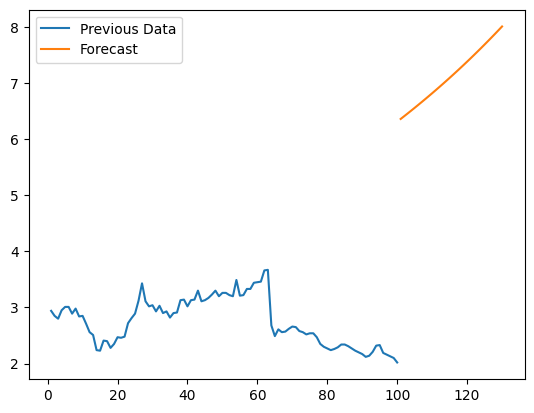

In [90]:
plt.plot(day_new, scaler.inverse_transform(df_close[len(df_close)-100:]))
plt.plot(day_pred, scaler.inverse_transform(output))
plt.legend(['Previous Data', 'Forecast'])

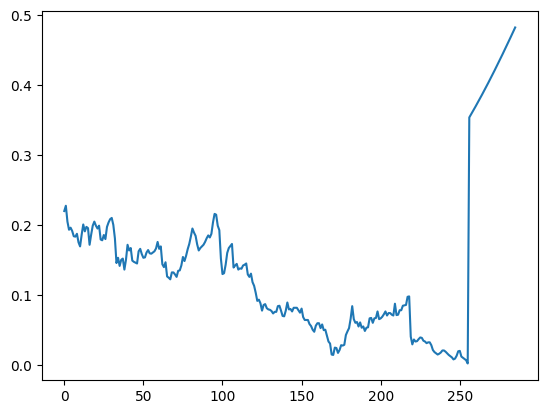

In [94]:
df_new = df_close.tolist()
df_new.extend(output)
plt.plot(df_new[1000:])

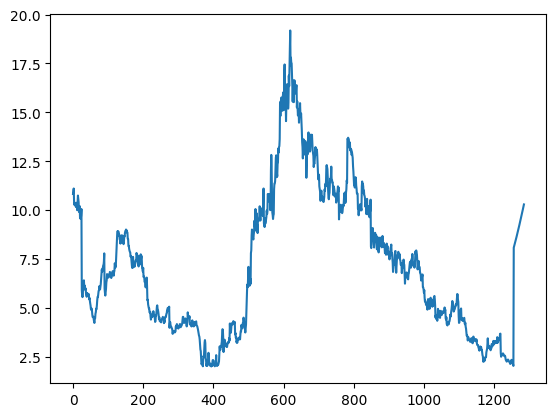

In [95]:
df_new = scaler.inverse_transform(df_new).tolist()
plt.plot(df_new)

---